<a href="https://colab.research.google.com/github/glamosky/labor-and-employment/blob/main/labor%20and%20employment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [98]:
url = "https://raw.githubusercontent.com/glamosky/labor-and-employment/refs/heads/main/employment%20rate.csv"

In [99]:
employment = pd.read_csv(url, skiprows=1)

employment

,Year,Monthly/Quarterly,Labor Force Participation Rate,Employment Rate,Unemployment Rate,Underemployment Rate,Visible Underemployment Rate
0,2025,January,63.86,95.73,4.27,13.34,8.03
1,2025,February,..,..,..,..,..
2,2025,March,..,..,..,..,..
3,2025,April,..,..,..,..,..
4,2025,May,..,..,..,..,..
...,...,...,...,...,...,...,...
268,2005,September,..,..,..,..,..
269,2005,October,65.29,92.62,7.38,20.90,12.76
270,2005,November,..,..,..,..,..
271,2005,December,..,..,..,..,..


In [100]:
employment = employment.replace([".."], 0)

employment = employment.replace(0, np.nan)

In [101]:
employment = employment.rename(columns = {'Monthly/Quarterly':'Month'})

In [102]:
employment = employment[employment.Month != 'Annual']

employment

,Year,Month,Labor Force Participation Rate,Employment Rate,Unemployment Rate,Underemployment Rate,Visible Underemployment Rate
0,2025,January,63.86,95.73,4.27,13.34,8.03
1,2025,February,NaN,NaN,NaN,NaN,NaN
2,2025,March,NaN,NaN,NaN,NaN,NaN
3,2025,April,NaN,NaN,NaN,NaN,NaN
4,2025,May,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
267,2005,August,NaN,NaN,NaN,NaN,NaN
268,2005,September,NaN,NaN,NaN,NaN,NaN
269,2005,October,65.29,92.62,7.38,20.90,12.76
270,2005,November,NaN,NaN,NaN,NaN,NaN


In [103]:
employment = pd.melt(
    employment,
    id_vars = ["Year", "Month"],
    value_vars = employment.columns[2:],
    var_name = "Rate Category",
    value_name = "Rate"
)

employment

,Year,Month,Rate Category,Rate
0,2025,January,Labor Force Participation Rate,63.86
1,2025,February,Labor Force Participation Rate,NaN
2,2025,March,Labor Force Participation Rate,NaN
3,2025,April,Labor Force Participation Rate,NaN
4,2025,May,Labor Force Participation Rate,NaN
...,...,...,...,...
1255,2005,August,Visible Underemployment Rate,NaN
1256,2005,September,Visible Underemployment Rate,NaN
1257,2005,October,Visible Underemployment Rate,12.76
1258,2005,November,Visible Underemployment Rate,NaN


In [104]:
# Ensure the Rate column is numeric
employment["Rate"] = pd.to_numeric(employment["Rate"], errors="coerce")

In [105]:
employment["Rate Category"].unique()

array(['Labor Force Participation Rate', 'Employment Rate',
       'Unemployment Rate', 'Underemployment Rate',
       'Visible Underemployment Rate'], dtype=object)

*I realized that using groupby() would make your life easier*

In [106]:
# for category in employment["Rate Category"].unique():
#   print(f"Description for {category}:")
#   # Filter out zero values before calculating descriptive statistics
#   filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]
#   print(filtered_data["Rate"].describe())
#   print("\n")

In [108]:
descriptions = employment.groupby("Rate Category")["Rate"].describe()
print(descriptions)

                                count       mean       std    min    25%  \
Rate Category                                                              
Employment Rate                 113.0  93.711858  1.942056  82.40  92.61   
Labor Force Participation Rate  113.0  63.739469  1.829068  55.69  63.30   
Underemployment Rate            113.0  16.435044  3.432924   9.85  13.80   
Unemployment Rate               113.0   6.288053  1.942143   3.07   4.83   
Visible Underemployment Rate    113.0  10.058938  2.132274   5.52   8.46   

                                  50%    75%    max  
Rate Category                                        
Employment Rate                 93.59  95.17  96.93  
Labor Force Participation Rate  64.00  64.80  67.45  
Underemployment Rate            16.28  19.01  25.76  
Unemployment Rate                6.41   7.39  17.60  
Visible Underemployment Rate    10.13  11.56  16.22  


In [79]:
# for category in employment["Rate Category"].unique():
#   # Filter the data for the current category
#   filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]

#   # Calculate median and mean for the current category
#   median = filtered_data["Rate"].median()
#   mean = filtered_data["Rate"].mean()

#   plt.figure(figsize=(10, 6))
#   sns.histplot(filtered_data["Rate"], bins=50, kde=True, color="royalblue", edgecolor="black")  # Plot "Rate" for the filtered data
#   plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label="Median")
#   plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label="Mean")
#   plt.title(f"Distribution of {category}")
#   plt.xlabel("Rate")
#   plt.ylabel("Frequency")
#   plt.legend()
#   plt.grid()

#   plt.show()

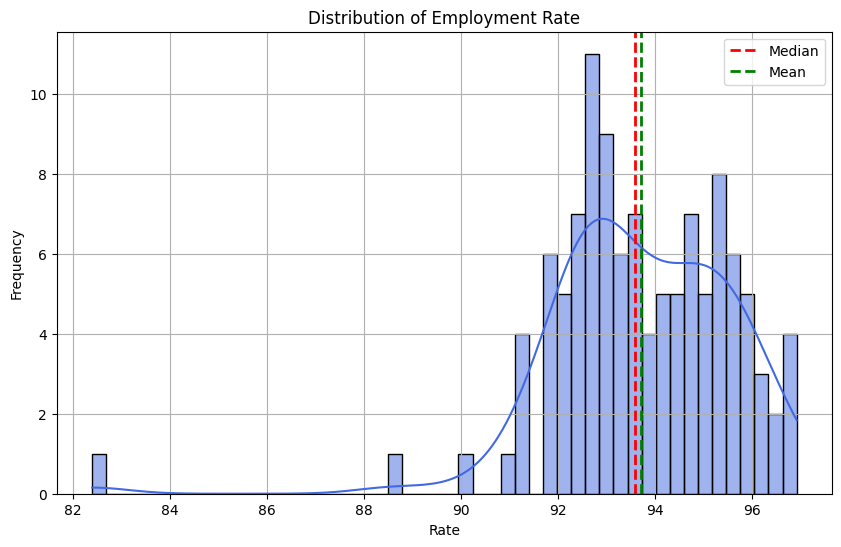

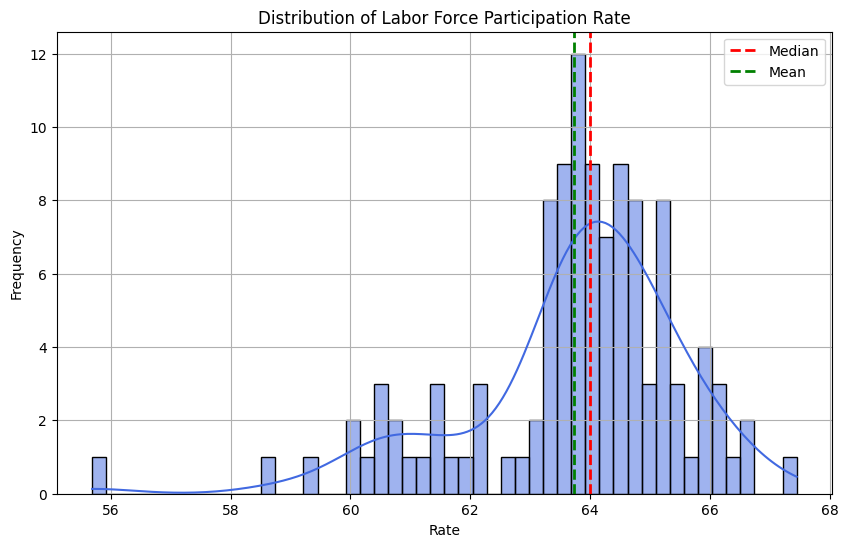

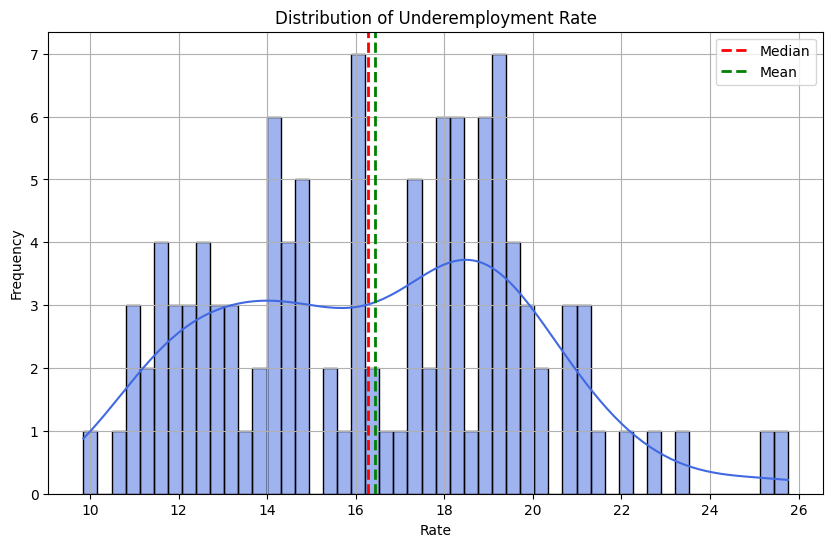

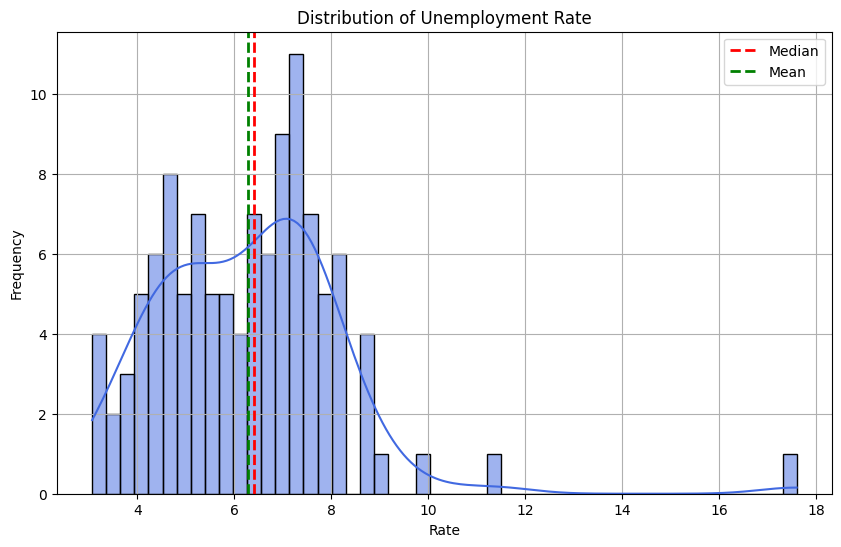

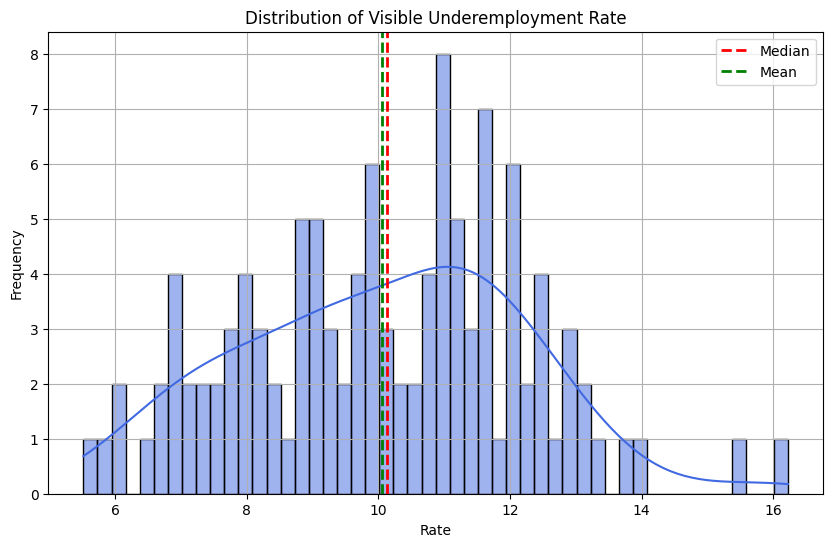

In [109]:
for category, group in employment.groupby("Rate Category"):
    median = group["Rate"].median()
    mean = group["Rate"].mean()

    plt.figure(figsize=(10, 6))
    sns.histplot(group["Rate"], bins=50, kde=True, color="royalblue", edgecolor="black")
    plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label="Median")
    plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label="Mean")
    plt.title(f"Distribution of {category}")
    plt.xlabel("Rate")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()

    plt.show()

In [81]:
# for category in employment["Rate Category"].unique():
#     # Filter data for the current category and exclude zero values
#     filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]

#     # Compute quantiles once for the filtered data
#     quantiles = filtered_data["Rate"].quantile([0.25, 0.5, 0.75])

#     print(f"Quantiles for {category}:")
#     print(quantiles)
#     print("\n")

In [110]:
quantiles = employment.groupby("Rate Category")["Rate"].quantile([0.25, 0.5, 0.75])
print(quantiles)

Rate Category                       
Employment Rate                 0.25    92.61
                                0.50    93.59
                                0.75    95.17
Labor Force Participation Rate  0.25    63.30
                                0.50    64.00
                                0.75    64.80
Underemployment Rate            0.25    13.80
                                0.50    16.28
                                0.75    19.01
Unemployment Rate               0.25     4.83
                                0.50     6.41
                                0.75     7.39
Visible Underemployment Rate    0.25     8.46
                                0.50    10.13
                                0.75    11.56
Name: Rate, dtype: float64


In [111]:
# IQR
Q1 = employment.groupby("Rate Category")["Rate"].quantile(0.25)
Q3 = employment.groupby("Rate Category")["Rate"].quantile(0.75)
IQR = Q3 - Q1
IQR

,Rate
Rate Category,
Employment Rate,2.56
Labor Force Participation Rate,1.50
Underemployment Rate,5.21
Unemployment Rate,2.56
Visible Underemployment Rate,3.10


In [112]:
# Outlier thresholds using 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(Rate Category
 Employment Rate                   88.770
 Labor Force Participation Rate    61.050
 Underemployment Rate               5.985
 Unemployment Rate                  0.990
 Visible Underemployment Rate       3.810
 Name: Rate, dtype: float64,
 Rate Category
 Employment Rate                   99.010
 Labor Force Participation Rate    67.050
 Underemployment Rate              26.825
 Unemployment Rate                 11.230
 Visible Underemployment Rate      16.210
 Name: Rate, dtype: float64)

In [ ]:
# determine the dates of the outliers